In [1]:
import time
import umap
import anndata
import collections
import numpy as np
import pandas as pd
import scanpy as sc
import MACA as maca
import cosg as cosg
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score

from scipy import io
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Human PBMC

In [2]:
data_file   = "Downloads/pbmc_rare_0.003619.h5ad"
adata = sc.read_h5ad(data_file)
adata.obs['cell_type']=adata.obs['final_annotation']
source = adata[adata.obs['study']=='Oetjen']
target = adata[adata.obs['study']!='Oetjen']
collections.Counter(target.obs['cell_type'])

Counter({'CD8+ T cells': 1198,
         'CD4+ T cells': 8487,
         'NKT cells': 2137,
         'NK cells': 2205,
         'CD14+ Monocytes': 5341,
         'CD20+ B cells': 2382,
         'Megakaryocyte progenitors': 51,
         'Plasmacytoid dendritic cells': 132,
         'Monocyte-derived dendritic cells': 264,
         'HSPCs': 28,
         'Plasma cells': 18,
         'CD16+ Monocytes': 85})

Human pancreas

In [10]:
data_file   = "Downloads/pancrease_rare_0.010878.h5ad"
adata = sc.read_h5ad(data_file)
source = adata[adata.obs['study']=='Pancreas inDrop']
target = adata[adata.obs['study']!='Pancreas inDrop']
collections.Counter(target.obs['cell_type'])

Counter({'Pancreas Alpha': 2455,
         'Pancreas Beta': 2037,
         'Pancreas Ductal': 1206,
         'Pancreas Acinar': 441,
         'Pancreas Gamma': 377,
         'Pancreas Endothelial': 147,
         'Pancreas Stellate': 199,
         'Pancreas Delta': 126})

Mouse brain

In [7]:
##marker identification
start_time = time.time()
cell_markers = maca.marker_identification(source_data=source,repeats=50,num_sub_cells=500,
                                          diff_method="cosg")##cosg
print("--- %s mins ---" % int((time.time() - start_time)/60))

**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker genes by COSG**
**finished identifying marker gene

In [8]:
marker_list = []
for k, v in cell_markers.items():
    marker_list += v
marker_list = list(set(marker_list))
marker_list = [i for i in marker_list if i in adata.var.index]
len(marker_list)
ad = adata[:,marker_list]

Trying to set attribute `.obs` of view, copying.


(31774, 16)


... storing 'Transfer' as categorical
... storing 'Annotation' as categorical


--- 2 mins ---


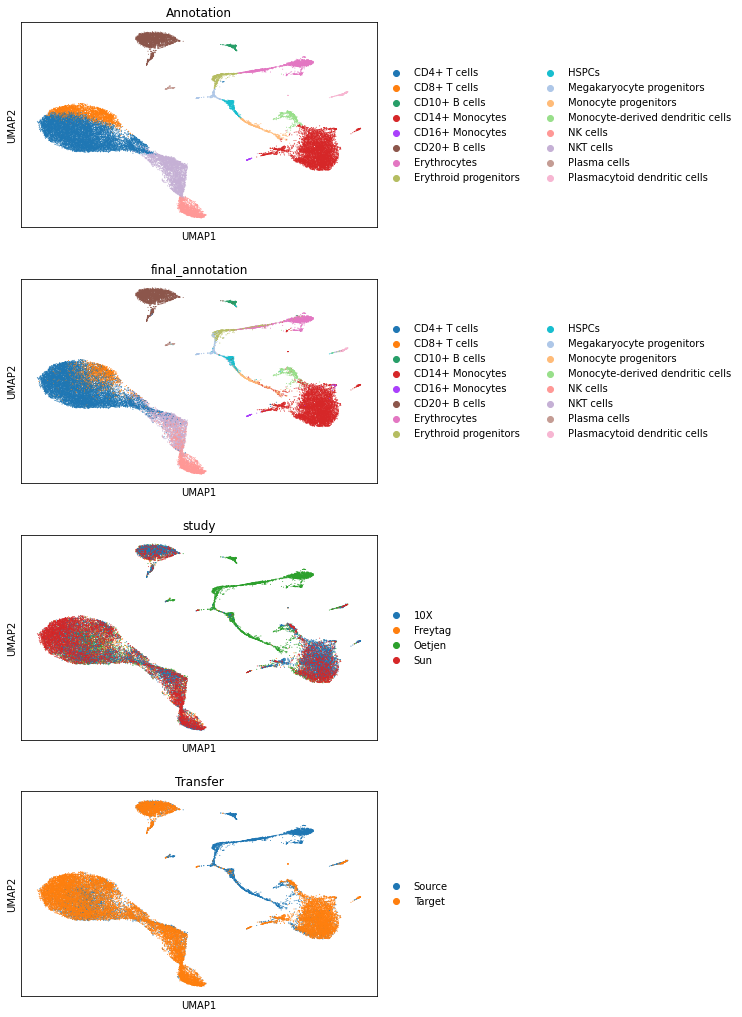

0.765
0.722
0.868


In [8]:
##run MACA on PBMC
start_time = time.time()
ad, annotation = maca.singleMACA(ad=ad, cell_markers=cell_markers,
                                 res=[2,3,5],n_neis=[5,10,15],use_weight=True)
print("--- %s mins ---" % int((time.time() - start_time)/60))

##visualization
refs = np.repeat("Target",ad.X.shape[0])
refs[adata.obs['study']=='Oetjen']="Source"
adata.obs['Transfer']=refs
adata.obs['Annotation']=annotation
adata.obsm['X_umap']=ad.obsm['X_umap']
sc.pl.umap(adata, color=["Annotation","final_annotation","study","Transfer"],ncols=1)

print(round(adjusted_rand_score(adata[adata.obs['study']!='Oetjen'].obs['final_annotation'],
                                np.array(annotation)[adata.obs['study']!='Oetjen']),3))
print(round(f1_score(adata[adata.obs['study']!='Oetjen'].obs['final_annotation'],
                     np.array(annotation)[adata.obs['study']!='Oetjen'], average='macro'),3))
print(round(accuracy_score(adata[adata.obs['study']!='Oetjen'].obs['final_annotation'],
                           np.array(annotation)[adata.obs['study']!='Oetjen']),3))

Trying to set attribute `.obs` of view, copying.


(14801, 8)


... storing 'Transfer' as categorical
... storing 'Annotation' as categorical


--- 0 mins ---


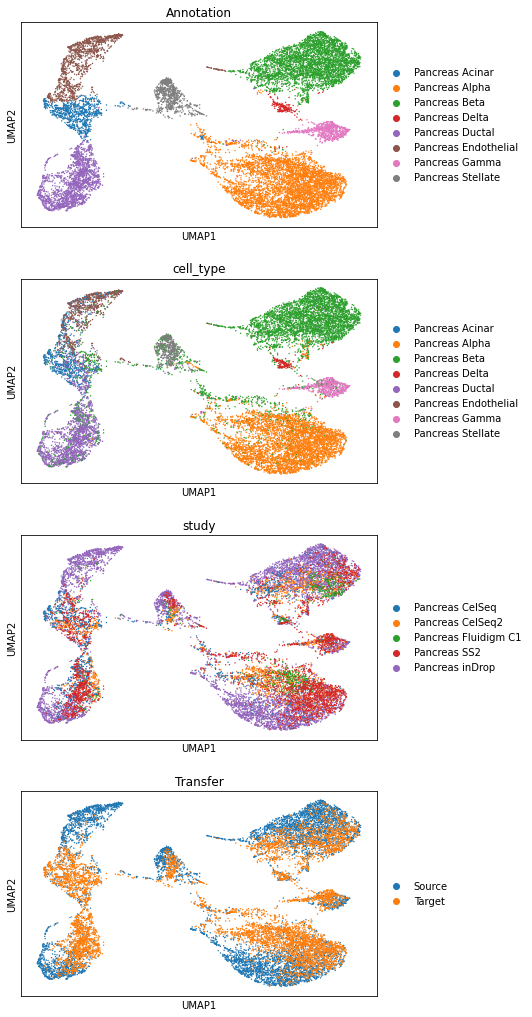

0.694
0.779
0.829


In [13]:
##run MACA on Pancreas
start_time = time.time()
ad, annotation = maca.singleMACA(ad=ad, cell_markers=cell_markers,
                                 res=[1,2,3],n_neis=[5,10,15],use_weight=True)
print("--- %s mins ---" % int((time.time() - start_time)/60))

##visualization
refs = np.repeat("Target",ad.X.shape[0])
refs[adata.obs['study']=='Pancreas inDrop']="Source"
adata.obs['Transfer']=refs
adata.obs['Annotation']=annotation
adata.obsm['X_umap']=ad.obsm['X_umap']
sc.pl.umap(adata, color=["Annotation","cell_type","study","Transfer"],ncols=1)

print(round(adjusted_rand_score(adata[adata.obs['study']!='Pancreas inDrop'].obs['cell_type'],
                                np.array(annotation[adata.obs['study']!='Pancreas inDrop'])),3))
print(round(f1_score(adata[adata.obs['study']!='Pancreas inDrop'].obs['cell_type'],
                     np.array(annotation[adata.obs['study']!='Pancreas inDrop']), average='macro'),3))
print(round(accuracy_score(adata[adata.obs['study']!='Pancreas inDrop'].obs['cell_type'],
                           np.array(annotation[adata.obs['study']!='Pancreas inDrop'])),3))